# Regression Analysis

A regression analysis will help us understand the relationship between a dependent variable and independent variables. 
The second part of the assignment which entails a university administrator who wants to test whether graduate students at the institution study, on average, more than 25 hours per week. To explore this, a random sample of 15 graduate students was surveyed, and the sample mean study time was found to be 27 hours per week, with a sample standard deviation of 4.5 hours.

The dependent variable is the number of hours graduate students study per week (sample mean: 27 hours). And independent Variable: Whether the hypothesis threshold of 25 hours per week is exceeded. Dependent on the model usage.  

We will see how various factors impact a specific outcome. For example, how hours of study and it affects the students' grades.  

The following questions where indicated.

1.  Fit a simple linear regression model to the data, where the dependent variable (Y) is the exam score, and the independent variable (X) is the hours of study.
2.  What are the assumptions of simple linear regression, and do you think they hold for this dataset?
3.  How would outliers in the data affect the regression model?
4.  If you need to verify the model what will you need and what will you do?

We will mainly cover the linear models. 

In [62]:
#Loading Libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Adjusted file path
fname = "../../data/Study Time Table.csv"

# Load the CSV data
df = pd.read_csv(fname)

# Or, set it permanently (be cautious with large DataFrames)
pd.set_option('display.max_rows', None)
print(df)

    Hours of Study      Score
0                5  52.122100
1                5  52.122100
2                7  72.122100
3                3  32.122100
4                0   2.122104
5                5  52.122100
6                2  22.122100
7                7  72.122100
8                4  42.122100
9                2  22.122100
10               1  12.122100
11               6  62.122100
12               8  82.122100
13               5  52.122100
14               7  72.122100
15               8  82.122100
16               7  72.122100
17               8  82.122100
18               8  82.122100
19               8  82.122100
20               0   2.122104
21               8  82.122100
22               7  72.122100
23               4  42.122100
24               6  62.122100
25               7  72.122100
26               2  22.122100
27               0   2.122104
28               8  82.122100
29               4  42.122100


The table above shows the data for the models 

## 1.  Fit a Simpler Linear Regression Model
To fit a linear regression model with exam Score as the dependent variable (y) and Hours of Study as the independent variable (x), we can use 
python's scipy.stats.linregress or statmodels library.  The code will precede the results.  The results are described below.

The OLS Regression Results:  
 1. Dependent variable: Score 
 2. Independent variable: Hours of Study 
 3. Model summary: R-squared value is 1.0000 which means the model explains 100 percent of the variance in score based on 
    hours of study. Adj r-squared is 1.0000 accounts for the number of predictors and suggests a perfect fit.tic
    F-statistic and Prob (F-statistic), the F-statistic tests value is extremely high and the p-value is practically zero
    that indicates that the model is statistically significant.
 4. Coefficient table.  Const(intercept) the coefficient for the intercept is 2.1221 which shows the expected Score
    when Hours of Study is 0. Hours of Study is the coefficent for Hours of Study is 10.000 which means that for each additional Hour of Study
    the Score is expected to increase by 10 pts. The standard error is very low, and the t-value is very high, which suggests that this coefficient
    is statistically significan
 5. Other Statistical Test.  Omnibus and Prob(Omnibus): The Omnibus test checks for normality in the residuals.  Here it is has a p-value of 0.080, 
    suggesting that residuals are likely normally distributed.  Jarque-Bera (JB) and Pro(Omnibus). Another test for normality in the residuals, with a p-value
    of 0.178, this also indicates normality.  Durbin-Watson. This value (1.965) tests for autocorrelation in residuals. A value near 2 suggests little to
    no autocorrelation, which is a good sign.  Skew and Kurtosis. These values measures the shape of the residual distribution. Values close to 0 to 3,  
    respectively, indicate that the residuals are normally distributed, which is desirable for a linear regression model.                                     

In [66]:
# Fit a Simple Linear Regression Model
## To fit a linear regression model with exam score as the dependent variable (y)
# and hours of study as the independent variable (x), we can use Python's scipy.stats.linregress or statsmodels library


import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Data provided
fname = "../../data/Study Time Table.csv"

# Load the CSV data
df = pd.read_csv(fname)

# Define X and Y
X = df['Hours of Study']
Y = df['Score']

# Add constant for the intercept in statsmodels
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display the summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.311e+16
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.20e-210
Time:                        12:24:19   Log-Likelihood:                 374.09
No. Observations:                  30   AIC:                            -744.2
Df Residuals:                      28   BIC:                            -741.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.1221   3.77e-07   5.63e

## Assumption of Simple Linear Regression

1. What are the assumptions of simpler linear regression, and do you think they hold for this dataset.

In linear regression, one of the assumptions is that the residuals (the differences between the observed and predicted values) are normally distributed. If this assumption is violated, it can affect the validity of the statistical inference and predictions made by the model. 

The key assumptions are:
1. Linearity.  The relationship between the independent variable (Hours of Study) and the dependent variable (Score) is linear
2. Indpendence. The residuals (errors) are independent of each other
3. Homoscedastity (variability in the data remains constant across the range of values). The vriance of residuals is constant across values of the independent variable.
4. Normality of Residuals. The residuals should be approximately normally distributed.

2.  Do These Assumptions Hold?
1.  Linearity. We can check this assumption by plotting Hours_of_Study vs Score.  If the points forma linear pattern, linearity likely holds.
    By the way, I have used Excel Analysis Tool and It worked out well.
2.  Independence. Assuming data points are independent (not collected from repeated measures of the same indviduals), this assumption likely holds
3.  Homoscedasticity. Plotting the residuals vs. fitted values can show if the spread of residuals is consistent.
4.  Normality. A histogram or Q-Q plot of residuals can help check for normality.

We will visually check assumptions in the following chart.

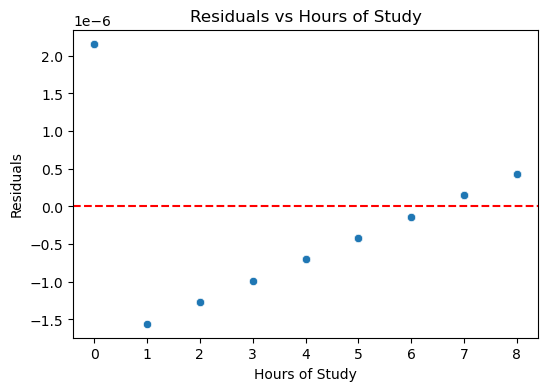

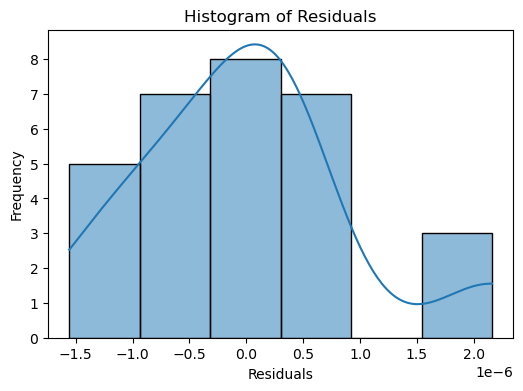

<Figure size 600x400 with 0 Axes>

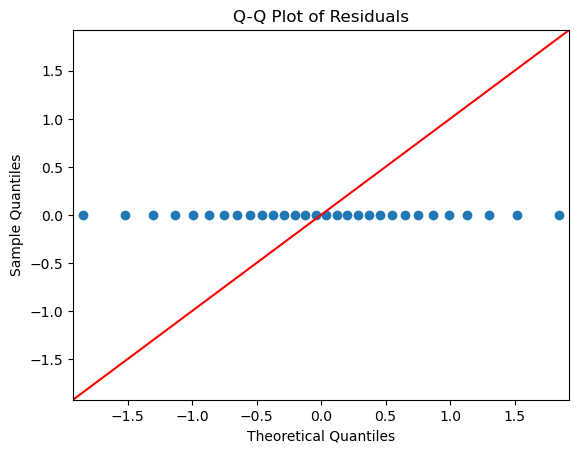

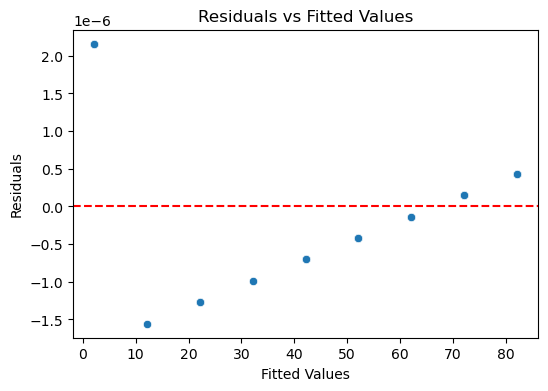

Durbin-Watson Statistic: 1.9648943457172086
Shapiro-Wilk Test for Normality (W-statistic, p-value): ShapiroResult(statistic=0.8952207403953512, pvalue=0.006429540639117402)


In [70]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data (adjust path as necessary)
fname = "../../data/Study Time Table.csv"
df = pd.read_csv(fname)

# Define X and Y
X = df['Hours of Study']
Y = df['Score']

# Add constant for the intercept in statsmodels
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()
residuals = model.resid

# 1. Linearity Assumption
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Hours of Study'], y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Hours of Study")
plt.ylabel("Residuals")
plt.title("Residuals vs Hours of Study")
plt.show()

# 2. Normality of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot for normality
plt.figure(figsize=(6, 4))
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

# 3. Homoscedasticity Assumption
plt.figure(figsize=(6, 4))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

# 4. Independence (Durbin-Watson Test)
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_stat)

# Optional: Shapiro-Wilk Test for Normality (statistical test)
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test for Normality (W-statistic, p-value):", shapiro_test)



1.  Residuals vs. Hours of Study.  Checks of linearity and homoscedascity.  f the residuals are randomly scattered without a clear pattern, it suggest the linear model is good.  If you see a funnel shape either the residual variance grows or shrinks as Hours of Study changes it could indicate heteroscedasticity (non-constant variances).
2.  Histogram or Residuals.  A first look at normality (a rough norm bell-shaped histogram indicates that residuals are normally distribuited, which is an indication of valid inference in linear regression.  Deviation from normality would show skewness or heavy tails that suggest issues with the model or data.
3.  Q-Q Plot of Residuals.  A more precise normality check (if the points in this plot closely follow the diagonal line, it suggests the residuals are normally distributed. Deviation from the line, particularly at the tails, indicate departures from normality.
4.  Residuals vs. Fitted Values.  A final check on linearity and homoscedasticity across predicted values
 
Note:  The regression analysis results in this case helps us understand the relationship between the number of hours studies and resulting exam scores.
After viewing the charted course.  You will notice that there is a negative number -1.5 and 1.  Based of the residual calculations there is difference between the observed vaues (actual scores) and the predicted values from the regression model.  In other words, residuals can be positive or negative. A positive residual indicates the observed value is higher than the predicted value, while a negative residual indicates the observed value is lower than the predicted value.  The second note is that the starting point of the residuals plot the x-axis in a residual vs. fitted values plot represent the predicted (fitted) values, while the y-axis represents the residuals.  The negative values on the y-axis show that the for some data points, the observed exam scores are below the scores predicted by the model.  This common and indicates variability around the regression line, which is normal for the real-world data. 
Observation.  There is no error with having negative values for residuals.  They identify how well the model fits with the data. You want the residual to be randomly scattered around the zero with no distinct pattern.  This randomness helps out with the assumptions of linearity and homoscedasticity.


## Effect of Outliers on the Regression Model
The outliers can have a significant impact on the regression by influencing the slope and intercept. A large outliers can skew the line.  That affect both the intercept and the slope.  And viewed as a misrepresentation.
Reducing the accuracy of prediticions.  The outliers increase the residual variance and reducing the R2 which leads to less accurate predictions.  In addition, violating assumptions.  The outliers may lead to vioating the normality or homoscedasticity assumptions.  Detecting outliers like Cook's Distance or Leverage Points.

## Verfiying the Model
To verify the model we can check the model assumption (linearity, independence, homoscedasticity, normality of residuals). The diagnostic performed earlier, residual plots, and Q-Q plots has shown it.  We can cross-validate with using a different sample to assess the model's performance for validity. We can evaluate goodness-of-fit metrics.  R2, Adjusted R2, and p-values of the coefficients to provide insight into the model's accuracy.  And we can also consider multicollinearity when addding additional predictors in the future by calculating Variance Inflation Factors (VIF).

These steps can assure the reliability of the model to accurately represent the relationship between the Hours of Study and Scores.


### Conclusion

The models shows that study more hours is strongly connected to getting higher scores. For every extra hour study, the score is increased by 10 points. The model's results are precise because the data fits well with the predicted patterns.